In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from datetime import datetime

In [2]:
df = pd.read_csv('Fire_Incidents.csv')

In [3]:
df.head()

,X,Y,OBJECTID,incident_number,incident_type,incident_type_description,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,platoon,station,address,address2,apt_room,GlobalID,CreationDate,Creator,EditDate,Editor
0,-78.626605,35.870213,474765,07-0031665,NaN,NaN,2007/11/15 11:17:00+00,2007/11/15 11:25:00+00,2007/11/15 11:10:00+00,0,,NaN,"6647 LAKE HILL DR RALEIGH, NC 27601",NaN,0,5c2e9c89-78d7-4348-bd95-23a69f4039aa,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral
1,-78.693642,35.792896,474766,08-0017918,NaN,NaN,2008/06/29 06:20:00+00,2008/06/29 06:42:00+00,2008/06/29 06:17:00+00,0,,NaN,"539 METHOD RD RALEIGH, NC 27606",NaN,,b6bdde67-94b6-409d-a17d-55498242caf1,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral
2,-78.627787,35.812171,474767,08-0032426,NaN,NaN,2008/11/18 04:19:00+00,2008/11/18 04:24:00+00,2008/11/18 04:12:00+00,0,,NaN,"2100 RUARK CT RALEIGH, NC 27601",NaN,202,46aba405-7f74-4e64-a9ef-2af357ab2cdd,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral
3,-78.595422,35.761213,474768,07-0023051,444.0,Power line down,2007/08/21 22:52:00+00,2007/08/21 22:58:00+00,2007/08/21 22:47:00+00,0,A,12.0,"1216 BEVERLY DR RALEIGH, NC 27601",NaN,,b58df98a-c21d-4a2e-a00d-b9b66087a822,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral
4,-78.537320,35.891622,474769,13-0030918,150.0,Outside rubbish fire Other,2013/10/19 21:52:00+00,2013/10/19 21:59:00+00,2013/10/19 21:47:00+00,0,B,22.0,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,eb6f5e12-dec5-4f55-9746-d2867a13d9e6,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral,2021/06/02 14:03:34.248+00,justin.greco@raleighnc.gov_ral


In [4]:
df.isnull().sum()

X                              5492
Y                              5492
OBJECTID                          0
incident_number                   0
incident_type                 22621
incident_type_description      4281
arrive_date_time              45234
cleared_date_time              1528
dispatch_date_time             1455
exposure                          0
platoon                        2723
station                       21667
address                           0
address2                     121471
apt_room                     105838
GlobalID                          0
CreationDate                      0
Creator                           0
EditDate                          0
Editor                            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232266 entries, 0 to 232265
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          226774 non-null  float64
 1   Y                          226774 non-null  float64
 2   OBJECTID                   232266 non-null  int64  
 3   incident_number            232266 non-null  object 
 4   incident_type              209645 non-null  float64
 5   incident_type_description  227985 non-null  object 
 6   arrive_date_time           187032 non-null  object 
 7   cleared_date_time          230738 non-null  object 
 8   dispatch_date_time         230811 non-null  object 
 9   exposure                   232266 non-null  int64  
 10  platoon                    229543 non-null  object 
 11  station                    210599 non-null  float64
 12  address                    232266 non-null  object 
 13  address2                   11

In [6]:
df['station'].value_counts()

1.0     17751
11.0    12375
12.0    12316
15.0    11049
19.0    10926
8.0     10519
3.0     10217
9.0      8474
22.0     8027
7.0      7896
20.0     7780
16.0     7772
5.0      7415
2.0      7090
14.0     7060
21.0     6899
6.0      6710
24.0     6495
10.0     6230
17.0     6111
18.0     5374
4.0      5327
26.0     5316
23.0     4526
25.0     4296
28.0     2951
27.0     2904
29.0      787
0.0         3
13.0        3
Name: station, dtype: int64

In [7]:
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])

In [8]:
time=df['dispatch_date_time'].iloc[0]
df['Hour']=df['dispatch_date_time'].apply(lambda time:time.hour)
df['Month']=df['dispatch_date_time'].apply(lambda time:time.month)
df['Day of Week']=df['dispatch_date_time'].apply(lambda time:time.dayofweek)

In [9]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

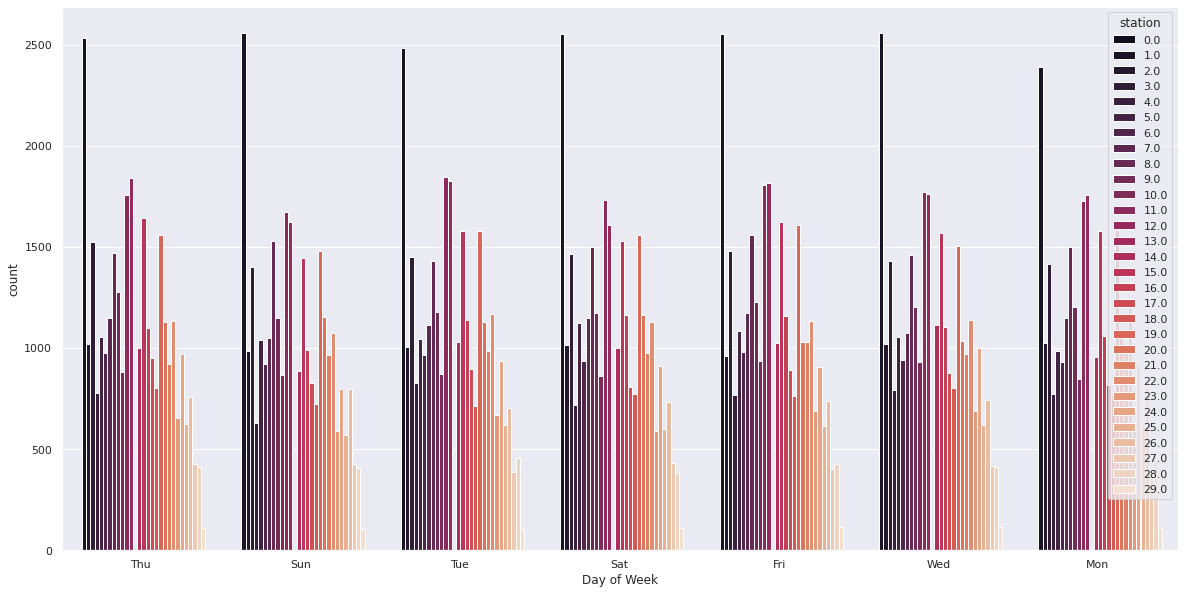

In [10]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Day of Week',data=df, hue='station',palette='rocket')

<AxesSubplot:xlabel='Month', ylabel='count'>

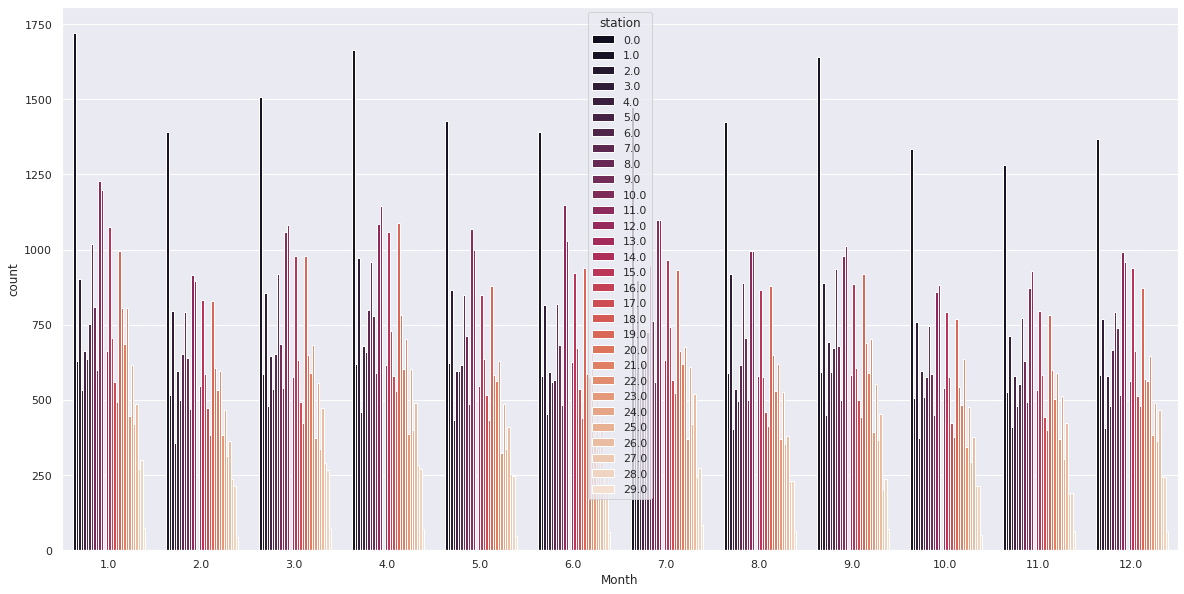

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Month',data=df, hue='station',palette='rocket')

In [12]:
byMonth=df.groupby('Month').count()
byMonth.head()

,X,Y,OBJECTID,incident_number,incident_type,incident_type_description,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,...,address,address2,apt_room,GlobalID,CreationDate,Creator,EditDate,Editor,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,,,
1.0,21672,21672,22115,22115,20018,21716,18002,22111,22115,22115,...,22115,10578,12110,22115,22115,22115,22115,22115,22115,22115
2.0,17234,17234,17630,17630,15880,17321,14287,17627,17630,17630,...,17630,8314,9456,17630,17630,17630,17630,17630,17630,17630
3.0,17745,17745,18303,18303,17858,17881,14672,18300,18303,18303,...,18303,8888,8830,18303,18303,18303,18303,18303,18303,18303
4.0,19274,19274,19902,19902,19502,19502,16068,19899,19902,19902,...,19902,10447,10100,19902,19902,19902,19902,19902,19902,19902
5.0,20039,20039,20549,20549,16946,20182,16471,20543,20549,20549,...,20549,8701,11642,20549,20549,20549,20549,20549,20549,20549


<AxesSubplot:xlabel='Month'>

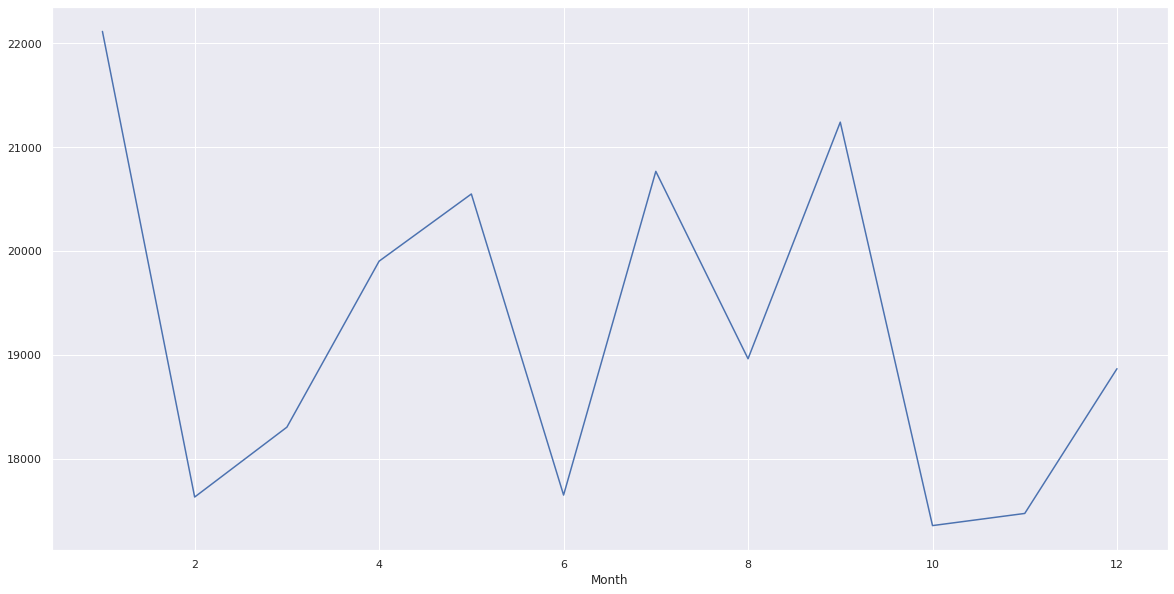

In [13]:
byMonth['address'].plot()

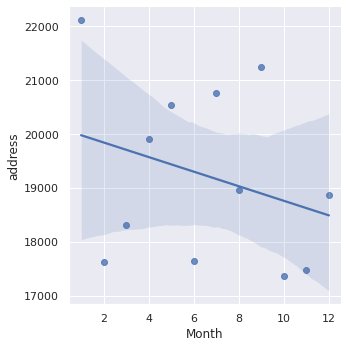

In [14]:
sns.lmplot(x='Month', y='address',data=byMonth.reset_index())

In [15]:
df['Date']=df['dispatch_date_time'].apply(lambda p:p.date())

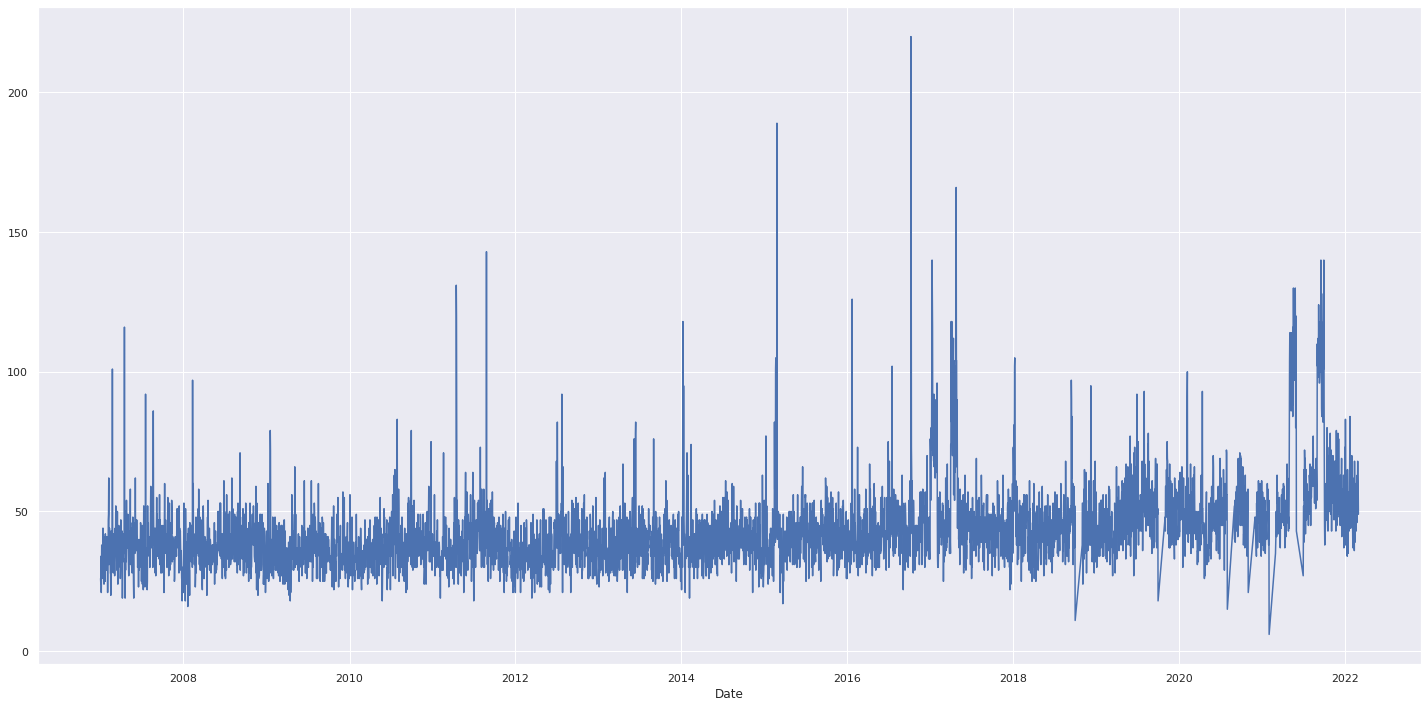

In [16]:
df.groupby('Date').count()['address'].plot()
plt.tight_layout()

In [17]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['address'].unstack()
dayHour.head()

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1706,1572,1314,1224,1024,937,855,682,658,651,...,1614,1740,1790,1817,1823,1860,1878,1912,1926,1951
Mon,1570,1460,1241,1146,990,856,711,669,638,605,...,1608,1769,1740,1837,1929,1864,1875,1960,1920,1825
Sat,1703,1591,1434,1345,1197,1058,1007,867,816,700,...,1392,1496,1698,1727,1640,1783,1814,1799,1981,1971
Sun,1779,1740,1520,1395,1349,1195,1126,1015,794,650,...,1264,1392,1523,1533,1577,1574,1619,1698,1801,1711
Thu,1733,1455,1313,1166,1015,854,790,701,620,602,...,1675,1805,1774,1877,1931,1944,1927,1996,1923,1960


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

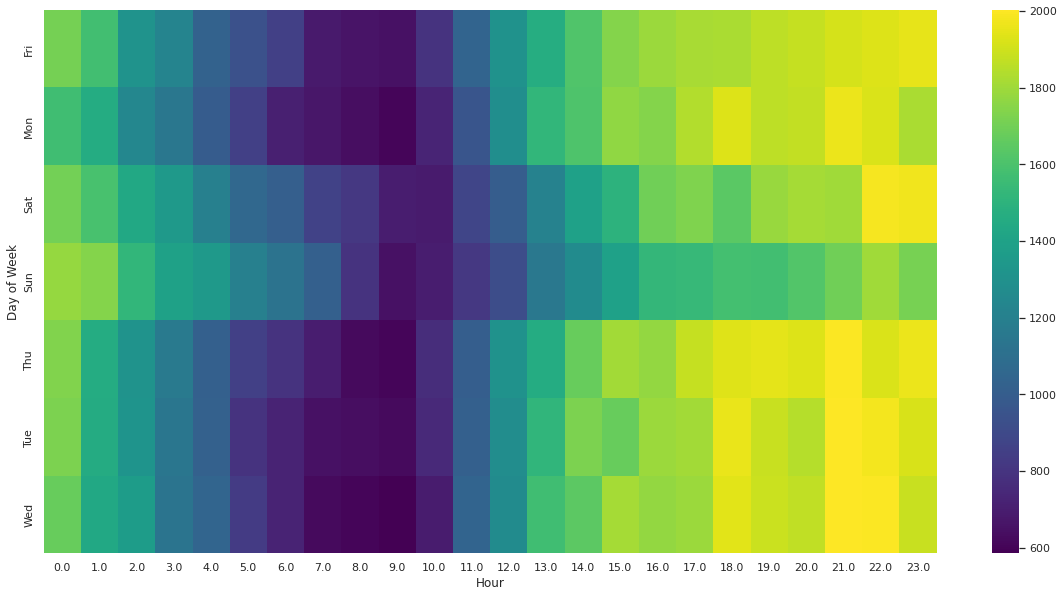

In [18]:
sns.heatmap(dayHour,cmap='viridis')

In [19]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['address'].unstack()
dayMonth.head()

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Day of Week,,,,,,,,,,,,
Fri,3167,2538,2723,2797,3042,2600,3037,2751,3129,2485,2512,2752
Mon,3187,2488,2484,2993,2899,2606,2934,2780,2954,2313,2496,2566
Sat,3099,2484,2675,2828,2873,2597,2832,2759,2957,2650,2492,2541
Sun,3143,2515,2576,2737,2840,2325,2797,2488,2852,2376,2496,2694
Thu,3121,2662,2605,2826,2995,2533,2996,2743,3172,2647,2516,2771


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

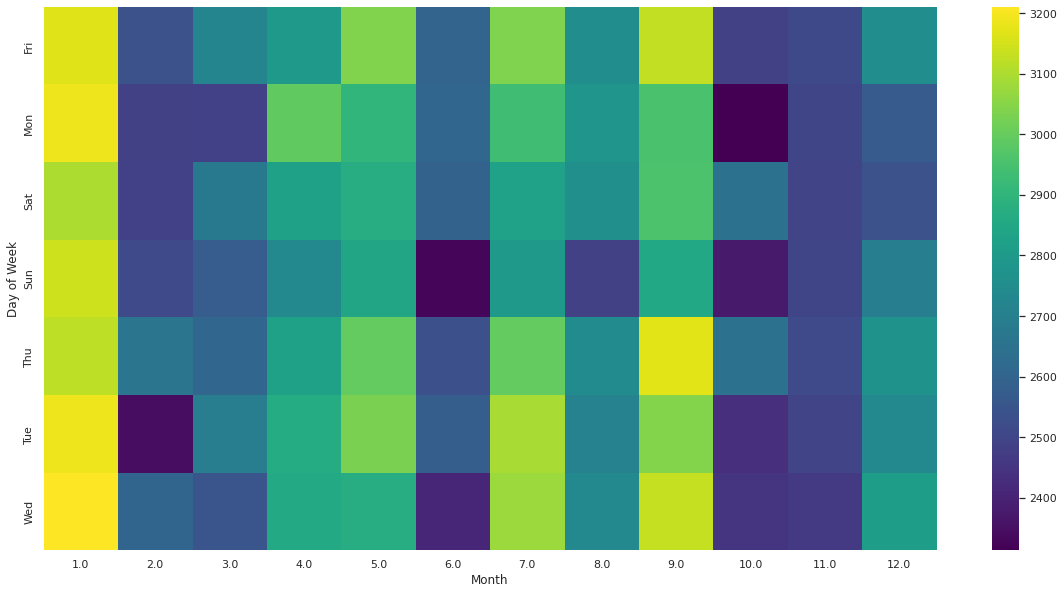

In [20]:
sns.heatmap(dayMonth,cmap='viridis')

In [21]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'incident_number', 'incident_type',
       'incident_type_description', 'arrive_date_time', 'cleared_date_time',
       'dispatch_date_time', 'exposure', 'platoon', 'station', 'address',
       'address2', 'apt_room', 'GlobalID', 'CreationDate', 'Creator',
       'EditDate', 'Editor', 'Hour', 'Month', 'Day of Week', 'Date'],
      dtype='object')

In [22]:
df['Day of Week'].fillna('Unknown',inplace = True)

In [23]:
df['incident_type_description'].value_counts()

Dispatched & cancelled en route                       39030
Dispatched & cancelled en route                       15115
False alarm or false call Other                       12236
Alarm system activation no fire - unintentional       11662
Service Call other                                    10901
                                                      ...  
Earthquake assessment                                     1
Water evacuation                                          1
Blasting agent explosion (no fire)                        1
RFD Injury/Accident Report                                1
Telephone malicious false alarm                           1
Name: incident_type_description, Length: 269, dtype: int64

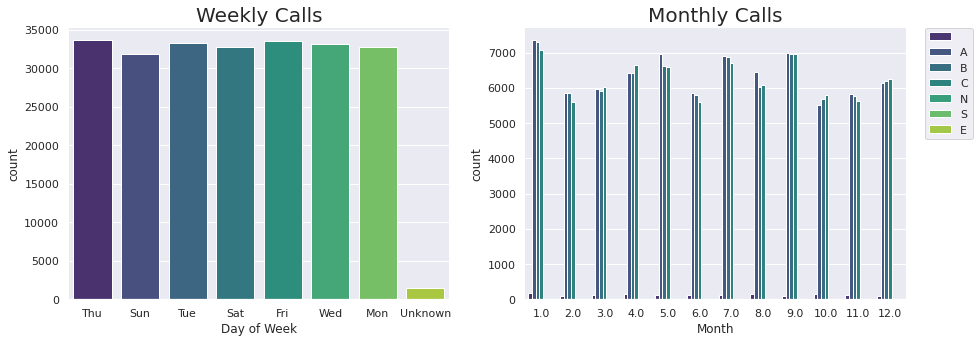

In [24]:
fig, axes = plt.subplots(1,2,figsize =(15,5))

sns.countplot(x='Day of Week', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Weekly Calls', size=20)

sns.countplot(x='Month', data=df, hue='platoon', palette='viridis', ax=axes[1])
axes[1].set_title('Monthly Calls', size=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


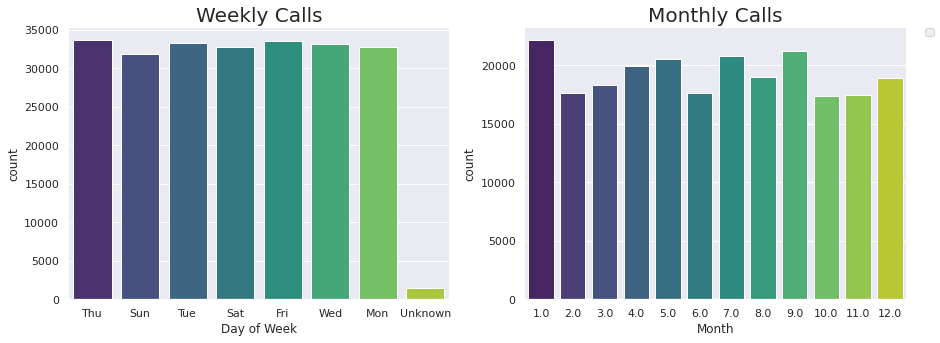

In [25]:
fig, axes = plt.subplots(1,2,figsize =(15,5))

station_count2 = df['station'].value_counts()
station_count2 = station_count2[:10]

sns.countplot(x='Day of Week', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Weekly Calls', size=20)

sns.countplot(x='Month', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Monthly Calls', size=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left=True)

In [44]:
df['Day of Week'].value_counts()\
                               .head(20)\
                               .to_frame(name='count')\
                               .reset_index()\
                               .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,Thu,33587
1,Fri,33533
2,Tue,33199
3,Wed,33166
4,Sat,32787
5,Mon,32700
6,Sun,31839
7,Unknown,1455


In [46]:
df['Month'].value_counts()\
                               .head(20)\
                               .to_frame(name='count')\
                               .reset_index()\
                               .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,1.000000,22115
1,9.000000,21241
2,7.000000,20767
3,5.000000,20549
4,4.000000,19902
5,8.000000,18962
6,12.000000,18866
7,3.000000,18303
8,6.000000,17649
9,2.000000,17630


/home/michael/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


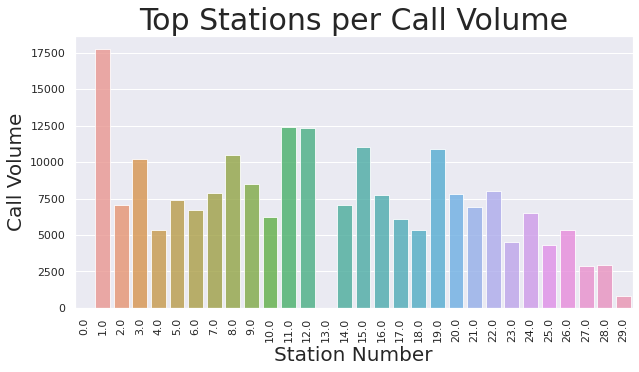

In [26]:
station_count = df['station'].value_counts()
station_count = station_count[:]
plt.figure(figsize = (10,5))
sns.barplot(station_count.index,station_count.values, alpha=0.8)
plt.title('Top Stations per Call Volume', fontsize = 30)
plt.xlabel('Station Number', fontsize = 20)
plt.ylabel('Call Volume', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

/home/michael/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


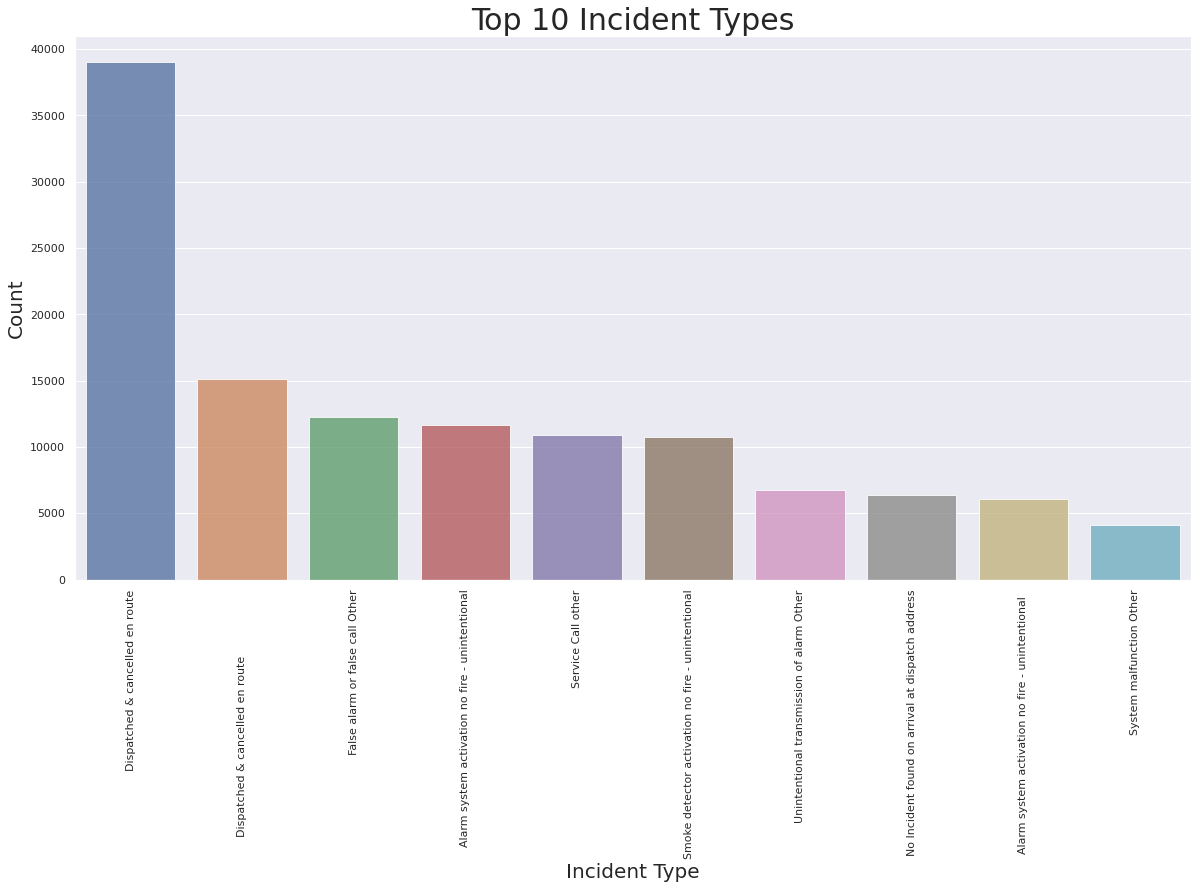

In [27]:
incident_count = df['incident_type_description'].value_counts()
incident_count = incident_count[:10]
sns.barplot(incident_count.index, incident_count.values,alpha=0.8)
plt.title('Top 10 Incident Types', fontsize = 30)
plt.xlabel('Incident Type', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [29]:
df['incident_type_description'].value_counts()\
                               .head(20)\
                               .to_frame(name='count')\
                               .reset_index()\
                               .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,Dispatched & cancelled en route,39030
1,Dispatched & cancelled en route,15115
2,False alarm or false call Other,12236
3,Alarm system activation no fire - unintentional,11662
4,Service Call other,10901
5,Smoke detector activation no fire - unintentional,10761
6,Unintentional transmission of alarm Other,6775
7,No Incident found on arrival at dispatch address,6408
8,Alarm system activation no fire - unintentional,6062
9,System malfunction Other,4115


In [43]:
df['station'].value_counts()\
                               .head(20)\
                               .to_frame(name='count')\
                               .reset_index()\
                               .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,1.000000,17751
1,11.000000,12375
2,12.000000,12316
3,15.000000,11049
4,19.000000,10926
5,8.000000,10519
6,3.000000,10217
7,9.000000,8474
8,22.000000,8027
9,7.000000,7896
